In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [12]:
# Charger les données
url2022 = "./Data/valeursfoncieres-2022.txt"
url2019 = "./Data/valeursfoncieres-2019.txt"
df2022 = pd.read_csv(url2022, delimiter = '|', low_memory=False)
df2019 = pd.read_csv(url2019, delimiter = '|', low_memory=False)

In [13]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes clés
df2022 = df2022[df2022['Surface reelle bati'] != '0']
df2022 = df2022[df2022['Surface reelle bati'] != '0']
print(df2019['Surface reelle bati'])
df2022 = df2022.dropna(subset=['Date mutation', 'Valeur fonciere', 'Surface reelle bati', 'Code departement'])
df2019 = df2019.dropna(subset=['Date mutation', 'Valeur fonciere', 'Surface reelle bati', 'Code departement'])

0           20.0
1           62.0
2            0.0
3           90.0
4          101.0
           ...  
3625898     97.0
3625899     45.0
3625900     47.0
3625901      0.0
3625902      4.0
Name: Surface reelle bati, Length: 3625903, dtype: float64


In [14]:
# Convertir les colonnes en types appropriés
df2019['Date mutation'] = pd.to_datetime(df2019['Date mutation'], format='%d/%m/%Y')
df2019['Valeur fonciere'] = df2019['Valeur fonciere'].str.replace(",", ".")
df2019['Valeur fonciere'] = df2019['Valeur fonciere'].astype(float)
df2019['Surface reelle bati'] = df2019['Surface reelle bati'].astype(int)
df2019 = df2019[df2019['Surface reelle bati'] != 0]
df2022['Date mutation'] = pd.to_datetime(df2022['Date mutation'], format='%d/%m/%Y')
df2022['Valeur fonciere'] = df2022['Valeur fonciere'].str.replace(",", ".")
df2022['Valeur fonciere'] = df2022['Valeur fonciere'].astype(float)
df2022['Surface reelle bati'] = df2022['Surface reelle bati'].astype(int)
df2022 = df2022[df2022['Surface reelle bati'] != 0]

In [15]:
print(df2019['Surface reelle bati'])
mean_value_2019 = df2019['Valeur fonciere'].mean()
mean_value_2022 = df2022['Valeur fonciere'].mean()
print(mean_value_2019)
print(mean_value_2022)

0           20
1           62
3           90
4          101
5           88
          ... 
3625897    100
3625898     97
3625899     45
3625900     47
3625902      4
Name: Surface reelle bati, Length: 1497191, dtype: int32
1626758.9528727122
916674.2846600624


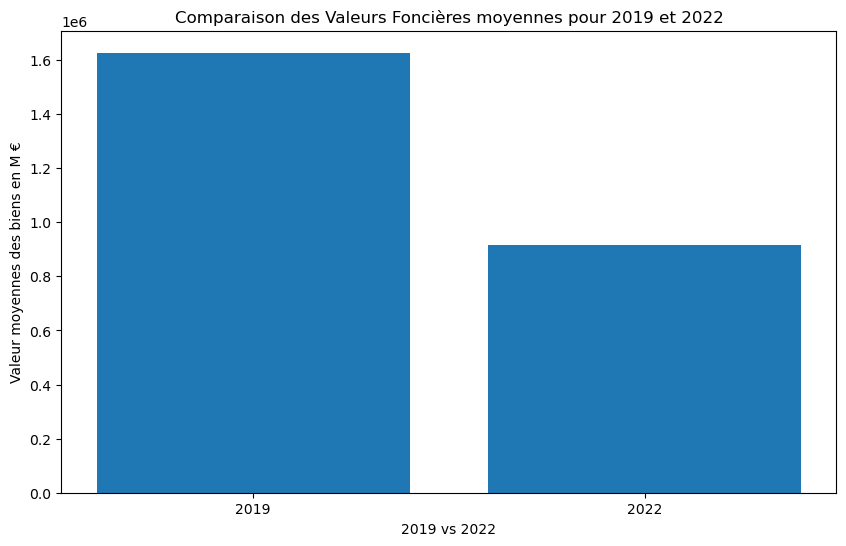

In [16]:
plt.figure(figsize=(10,6))
plt.bar(["2019", "2022"], [mean_value_2019, mean_value_2022])
plt.title('Comparaison des Valeurs Foncières moyennes pour 2019 et 2022')
plt.xlabel('2019 vs 2022')
plt.ylabel('Valeur moyennes des biens en M €')
plt.show()

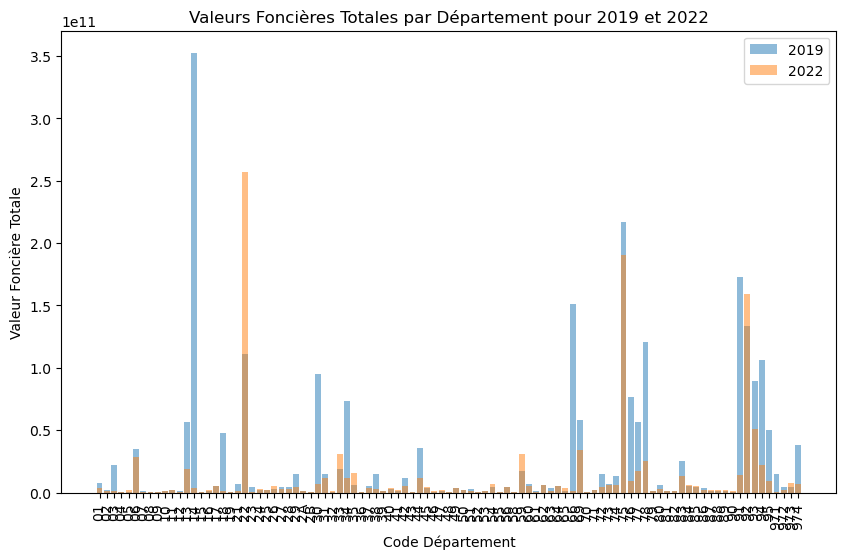

In [17]:
total_value_2019 = df2019.groupby('Code departement')['Valeur fonciere'].sum()
total_value_2022 = df2022.groupby('Code departement')['Valeur fonciere'].sum()

plt.figure(figsize=(10,6))
plt.bar(total_value_2019.index, total_value_2019.values, alpha=0.5, label='2019')
plt.bar(total_value_2022.index, total_value_2022.values, alpha=0.5, label='2022')
plt.title('Valeurs Foncières Totales par Département pour 2019 et 2022')
plt.xlabel('Code Département')
plt.ylabel('Valeur Foncière Totale')
plt.legend()
plt.xticks(rotation=90)
plt.show()

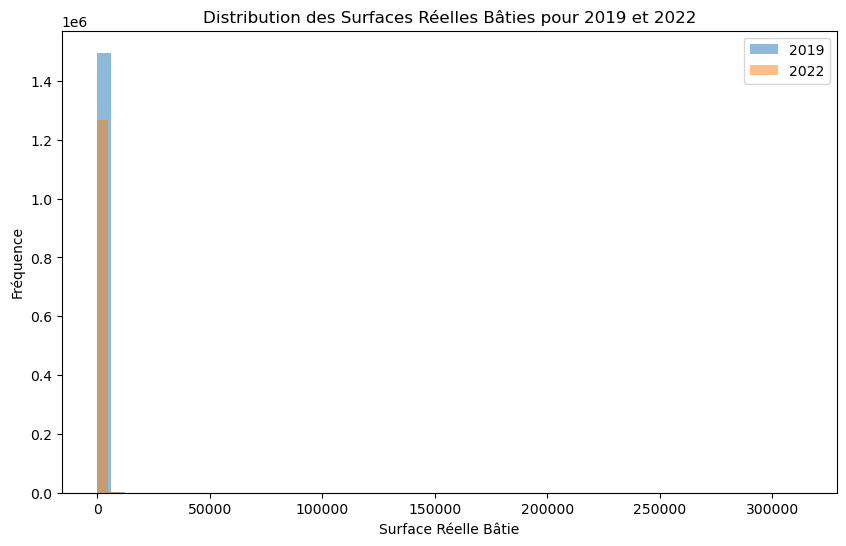

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df2019['Surface reelle bati'], bins=50, alpha=0.5, label='2019')
plt.hist(df2022['Surface reelle bati'], bins=50, alpha=0.5, label='2022')
plt.title('Distribution des Surfaces Réelles Bâties pour 2019 et 2022')
plt.xlabel('Surface Réelle Bâtie')
plt.ylabel('Fréquence')
plt.legend(loc='upper right')

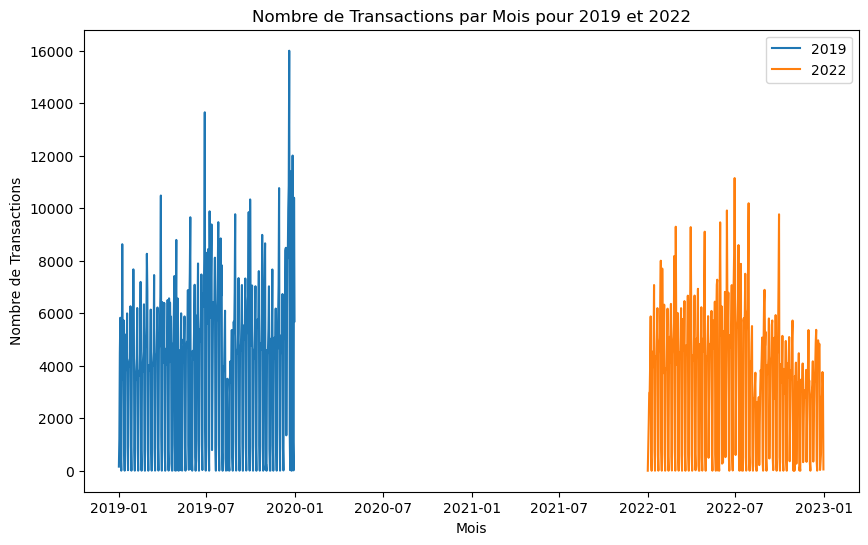

In [19]:
transaction_count_2019 = df2019.groupby('Date mutation').size()
transaction_count_2022 = df2022.groupby('Date mutation').size()

plt.figure(figsize=(10,6))
plt.plot(transaction_count_2019.index, transaction_count_2019.values, label='2019')
plt.plot(transaction_count_2022.index, transaction_count_2022.values, label='2022')
plt.title('Nombre de Transactions par Mois pour 2019 et 2022')
plt.xlabel('Mois')
plt.ylabel('Nombre de Transactions')
plt.legend()
plt.show()

In [21]:
df2019['Prix m2'] = df2019['Valeur fonciere'] / df2019['Surface reelle bati']
df2022['Prix m2'] = df2022['Valeur fonciere'] / df2022['Surface reelle bati']

prix_moyen2019 = df2019.groupby('Code departement')['Prix m2'].mean()
prix_moyen2022 = df2022.groupby('Code departement')['Prix m2'].mean()

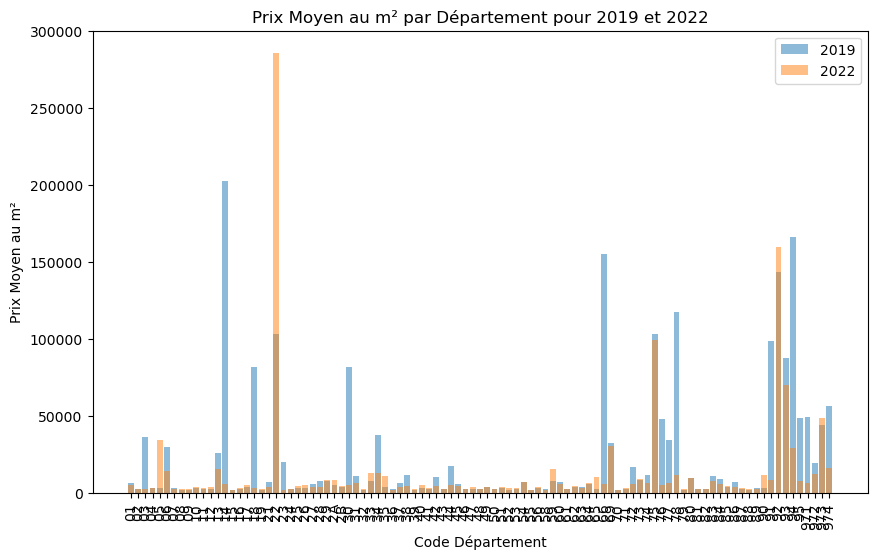

In [22]:
plt.figure(figsize=(10,6))
plt.bar(prix_moyen2019.index, prix_moyen2019.values, alpha=0.5, label='2019')
plt.bar(prix_moyen2022.index, prix_moyen2022.values, alpha=0.5, label='2022')
plt.title('Prix Moyen au m² par Département pour 2019 et 2022')
plt.xlabel('Code Département')
plt.ylabel('Prix Moyen au m²')
plt.legend()
plt.xticks(rotation=90)
plt.show()